In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt 


In [0]:
x_data = np.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
y_data = np.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
m = x_data.shape[0]

x_data = np.reshape(x_data,(m,1))
y_data = np.reshape(y_data,(m,1))

In [0]:
np.random.seed(2)
tf.set_random_seed(2)

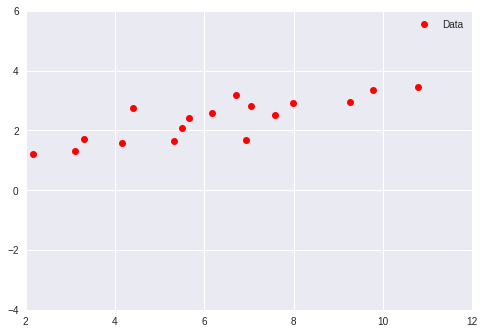

In [4]:
plt.plot(x_data, y_data, 'ro', label='Data')

plt.legend()
x1,x2,y1,y2 = plt.axis()
plt.axis((2,12,-4,6))
plt.show()

In [0]:
display_step = 10
n_steps = 100    
n_iterations = []  
n_loss = []      
learned_weight = []  
learned_bias = []  

In [0]:
learning_rate = 0.001

In [0]:
X = tf.placeholder(tf.float32, shape=(m, 1), name="input") 
y = tf.placeholder(tf.float32, shape=(m,1), name="label")

In [0]:
W = tf.Variable(tf.random_uniform([1], -1.0, 1.0))
b = tf.Variable(tf.zeros([1]))

In [0]:
y_hat = W * X + b

In [0]:
loss = (1/(2*m)) * tf.reduce_sum(tf.square(y_hat - y))

In [0]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate)

In [0]:
train_step = optimizer.minimize(loss)

In [13]:
with tf.Session() as sess:
  
  sess.run(tf.global_variables_initializer())
  for step in range(n_steps):
    _, c = sess.run([train_step,loss], feed_dict={X: x_data, y: y_data})
    
    #Record Keeping
    n_iterations.append(step)
    n_loss.append(c)
    learned_weight.append(W.eval())
    learned_bias.append(b.eval())
  
    # Display logs per epoch step
    if (step+1) % display_step == 0:
            #c = sess.run(loss)
            print("Epoch:", '%04d' % (step+1), "Cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b))
  


print("")

Epoch: 0010 Cost= 1.781451106 W= [0.09888824] b= [0.02220841]
Epoch: 0020 Cost= 0.773719907 W= [0.19392891] b= [0.03653015]
Epoch: 0030 Cost= 0.373772442 W= [0.25375253] b= [0.04588332]
Epoch: 0040 Cost= 0.215011865 W= [0.29139143] b= [0.05210616]
Epoch: 0050 Cost= 0.151961699 W= [0.31505522] b= [0.05635668]
Epoch: 0060 Cost= 0.126892388 W= [0.32991555] b= [0.05936433]
Epoch: 0070 Cost= 0.116895162 W= [0.33923024] b= [0.06158864]
Epoch: 0080 Cost= 0.112879105 W= [0.3450516] b= [0.0633191]
Epoch: 0090 Cost= 0.111236721 W= [0.34867227] b= [0.06473806]
Epoch: 0100 Cost= 0.110536389 W= [0.3509068] b= [0.06596039]



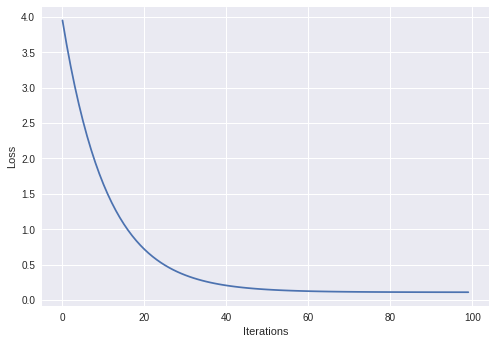

In [14]:
plt.plot(n_iterations,n_loss)
plt.ylabel('Loss')
plt.xlabel('Iterations')
plt.show()


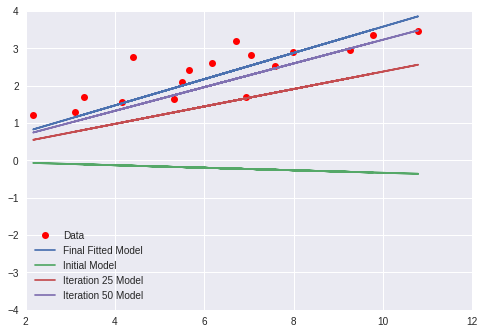

In [15]:
plt.plot(x_data, y_data, 'ro', label='Data')
plt.plot(x_data, learned_weight[-1] * x_data + learned_bias[-1], label='Final Fitted Model')
plt.plot(x_data, learned_weight[0] * x_data + learned_bias[0], label='Initial Model')
plt.plot(x_data, learned_weight[25] * x_data + learned_bias[25], label='Iteration 25 Model')
plt.plot(x_data, learned_weight[50] * x_data + learned_bias[50], label='Iteration 50 Model')
plt.legend()
x1,x2,y1,y2 = plt.axis()
plt.axis((2,12,-4,4))
plt.show()

In [16]:
x_test = 3.0

y_prediction = learned_weight[-1] * x_test + learned_bias[-1]

print("x_test=3.0")
print("Prediction for x_test: " + str(y_prediction))

x_test=3.0
Prediction for x_test: [1.1186807]
